
# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2025**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2025_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:10]

,Unnamed: 0,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,salir_o_seguir_contestando_sobre_las_guardias,work_on_call_duty,salary_on_call_duty_charge,aclara_el_numero_que_ingresaste_en_el_campo_anterior,profile_age,profile_gender,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
0,0,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),6500000.00,5800000.00,Cobro parte del salario en dólares,NaN,De uno a tres sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,45,Hombre Cis,Sí,True,Senior,6500000.00
1,1,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,12700000.00,10200000.00,Cobro todo el salario en dólares,NaN,Un sueldo,Performance de la compañía,...,Terminar encuesta,No,0.0,Bruto,32,Mujer Cis,Sí,True,Senior,12700000.00
2,2,Córdoba,Full-Time,Staff (planta permanente),3952805.00,3137662.00,Cobro parte del salario en dólares,985,No,No recibo bono,...,NaN,NaN,NaN,NaN,29,Hombre Cis,Sí,True,Semi-Senior,3952805.00
3,3,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),1606000.00,1360000.00,Cobro parte del salario en dólares,1004,No,No recibo bono,...,NaN,NaN,NaN,NaN,25,Hombre Cis,Sí,True,Semi-Senior,1606000.00
4,4,Córdoba,Full-Time,Tercerizado (trabajo a través de consultora o ...,1325301.00,NaN,Cobro parte del salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,NaN,NaN,NaN,22,Hombre Cis,Sí,True,Senior,1325301.00
5,5,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),2670205.00,2167989.00,Cobro parte del salario en dólares,986,No,No recibo bono,...,Terminar encuesta,No,0.0,Porcentaje de mi sueldo bruto,48,Hombre Cis,Sí,True,Senior,2670205.00
6,6,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),4000000.00,4000000.00,Cobro todo el salario en dólares,NaN,No,No recibo bono,...,Terminar encuesta,No,0.0,Bruto,50,Hombre Cis,Sí,True,Senior,4000000.00
7,7,Córdoba,Full-Time,Staff (planta permanente),4200000.00,3600000.00,Cobro parte del salario en dólares,1070,No,No recibo bono,...,Responder sobre guardias,"Sí, pasiva",0.0,Porcentaje de mi sueldo bruto,43,Hombre Cis,Sí,True,Senior,4200000.00
8,8,Buenos Aires,Full-Time,Freelance,3000000.00,2000000.00,Mi sueldo está dolarizado (pero cobro en moned...,1150,No,No recibo bono,...,NaN,NaN,NaN,NaN,41,Hombre Cis,No,True,Senior,3000000.00
9,9,Buenos Aires,Full-Time,Staff (planta permanente),3953142.06,3258576.49,Mi sueldo está dolarizado (pero cobro en moned...,NaN,Un sueldo,Performance de la compañía,...,NaN,NaN,NaN,NaN,47,Hombre Cis,Sí,True,Senior,3953142.06


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 300000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 1000K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [4]:
# Para ver las columnas relevantes, observemos primero todas las columnas.
list(df.columns)

['Unnamed: 0',
 'work_province',
 'work_dedication',
 'work_contract_type',
 'salary_monthly_BRUTO',
 'salary_monthly_NETO',
 'salary_in_usd',
 'salary_last_dollar_value',
 'salary_has_bonus',
 'salary_bonus_tied_to',
 'salary_inflation_adjustment',
 'salary_percentage_inflation_adjustment',
 'salary_month_last_inflation_adjustment',
 'salary_comparison_last_semester',
 'salary_benefit',
 'salary_satisfaction',
 'estas_buscando_trabajo',
 'pluriempleo',
 'company_main_activity',
 'profile_years_experience',
 'work_years_in_company',
 'work_years_in_current_position',
 'work_people_in_charge_of',
 'tools_platform',
 'tools_programming_languages',
 'tools_frameworks',
 'tools_data_bases',
 'tools_qa_testing',
 'company_employee_number',
 'work_work_modality',
 'company_days_in_the_office',
 'en_los_ultimos_6_mesesse_aplico_alguna_politica_de_ajustes_salariales',
 'opcionalen_que_empresaorganizacion_estas_trabajando',
 'company_recommended',
 'tools_copilotchatgpt',
 'algo_que_quieras_dec

In [5]:
# Las columnas relevantes son las siguientes:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO'] # Agregar más si se quiere

In [6]:
# Para ver qué filas son relevantes, hagamos un análisis sobre las columnas numéricas relevantes
relevant_numeric_columns = ['salary_monthly_NETO'] # Agregar más si se quiere
df[relevant_numeric_columns].describe().map(lambda x: round(x, 2))

,salary_monthly_NETO
count,4.951000e+03
mean,1.072550e+10
std,7.545122e+11
min,4.000000e+00
25%,1.288264e+06
50%,1.916958e+06
75%,2.893500e+06
max,5.309001e+13


Notamos que el salario máximo es mucho mayor que la media, mientras que el salario mínimo es apenas 4, lo cual parece poco realista. Vamos a intentar eliminar los datos que carecen de sentido.

In [7]:
# Armamos un nuevo DataFrame que filtra los datos, recortando las filas que se encuentran por encima
# del percentil 99 y por debajo del percentil 1 para todas las columnas numéricas relevantes
df_filtered = df.copy()  # trabajamos sobre una copia

for col in relevant_numeric_columns:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]

In [8]:
# Veamos ahora el resumen estadístico del nuevo dataframe
df_filtered[relevant_numeric_columns].describe().map(lambda x: round(x, 2))

,salary_monthly_NETO
count,4852.00
mean,2248259.43
std,1355399.87
min,250000.00
25%,1300000.00
50%,1914251.50
75%,2808051.46
max,8500000.00


Ahora el mínimo ya es de 250.000 (mucho más razonable) y el máximo de 8.500.000 (del mismo orden que la media de 2.248.259). Por lo tanto, el nuevo DataFrame parece eliminar los datos "erróneos"

Sin embargo, notemos que en la edad (que no es una columna relevante para este análisis en particular) aparece un valor máximo absurdo:

In [9]:
df_filtered.profile_age.describe()

count    4852.000000
mean       36.596455
std        46.379290
min        19.000000
25%        29.000000
50%        35.000000
75%        41.000000
max      3040.000000
Name: profile_age, dtype: float64

In [10]:
# Eliminemos todos los valores menores a 100 años
df_filtered = df_filtered[df_filtered['profile_age']<100]
# veamos como cambió
df_filtered.profile_age.describe()

count    4847.000000
mean       35.660202
std         8.386571
min        19.000000
25%        29.000000
50%        35.000000
75%        41.000000
max        99.000000
Name: profile_age, dtype: float64

In [11]:
# Eliminamos los NaN del salario tambien?
# ¿Podemos restringir a un subconjunto? ¿A cual?
# Agregar eso a columnas relevantes. 
# Ver si hay mas part o full time, cobro en dolares o no, que sean de alguna ciudad en particular, etc.

También podemos tener en cuenta solamente un tipo de dedicación, ya sea Full-Time o Part-Time. Para eso, calculemos cual de los dos tipos abunda.

In [12]:
df_filtered.work_dedication.unique()

array(['Part-Time', 'Full-Time'], dtype=object)

In [13]:
df_filtered.work_dedication.describe()

count          4847
unique            2
top       Full-Time
freq           4642
Name: work_dedication, dtype: object

In [14]:
df_filtered = df_filtered[df_filtered['work_dedication'] == 'Full-Time']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [15]:
df_filtered.tools_programming_languages[:3]

2                          SQL
5    Ninguno de los anteriores
6            .NET, Python, SQL
Name: tools_programming_languages, dtype: object


Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

In [16]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_filtered.loc[:, 'cured_programming_languages'] = df_filtered.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df_filtered.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_filtered[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
2,sql,SQL,3137662.0,[sql]
6,.net,".NET, Python, SQL",4000000.0,"[.net, python, sql]"
6,python,".NET, Python, SQL",4000000.0,"[.net, python, sql]"
6,sql,".NET, Python, SQL",4000000.0,"[.net, python, sql]"
7,c++,"C++, Python",3600000.0,"[c++, python]"


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [17]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'programming_language': 'language', 'count': 'frequency'})
    #.rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,sql,2088
1,javascript,1706
2,python,1507
3,html,1231
4,typescript,947
5,css,860
6,bash/shell,800
7,java,773
8,php,568
9,.net,544


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [18]:
# En una primera instancia, podemos tomar como los lenguajes relevantes a los 10 más utilizados
interesting_languages = language_count['language'].head(10).tolist()
interesting_languages

['sql',
 'javascript',
 'python',
 'html',
 'typescript',
 'css',
 'bash/shell',
 'java',
 'php',
 '.net']

In [19]:
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
2,sql,SQL,3137662.0,[sql]
6,.net,".NET, Python, SQL",4000000.0,"[.net, python, sql]"
6,python,".NET, Python, SQL",4000000.0,"[.net, python, sql]"
6,sql,".NET, Python, SQL",4000000.0,"[.net, python, sql]"
7,python,"C++, Python",3600000.0,"[c++, python]"


In [20]:
# Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir 
# en el análisis.

Ahora comencemos con el análisis de los datos. Como primera instancia, veremos un boxplot para saber de forma cualitativa cuánto gana la gente dependiendo en los lenguajes de propgramación.

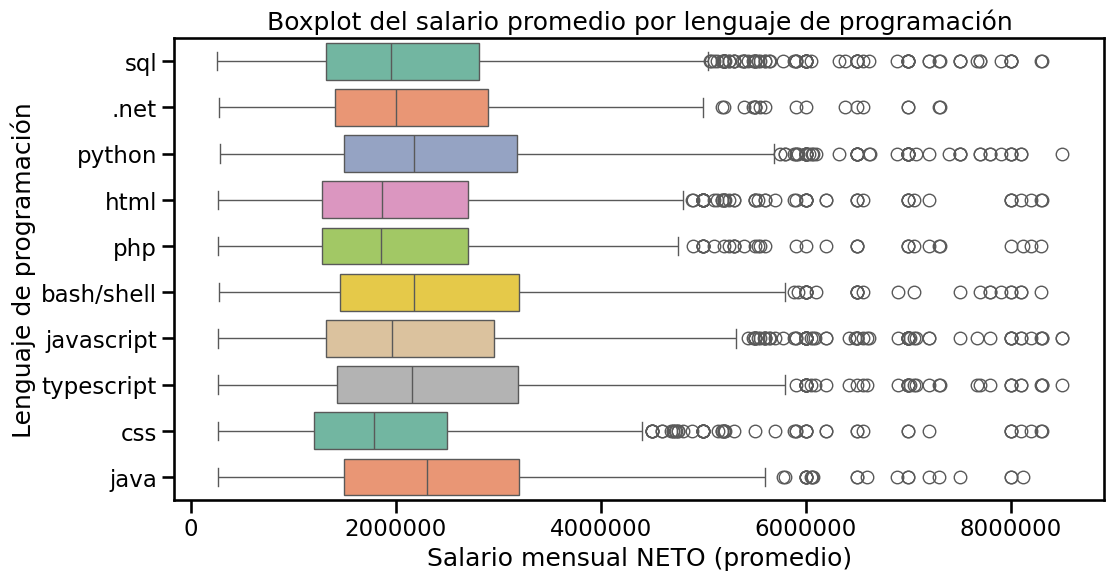

In [56]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=filtered_df_lang, 
                x='salary_monthly_NETO', 
                y='programming_language',
                hue='programming_language',
                legend=False,
                palette='Set2')
plt.xlabel('Salario mensual NETO (promedio)')
plt.ylabel('Lenguaje de programación')
plt.title('Boxplot del salario promedio por lenguaje de programación')
plt.ticklabel_format(style='plain', axis='x')

También podemos graficar la media de sueldo neto para cada lenguaje

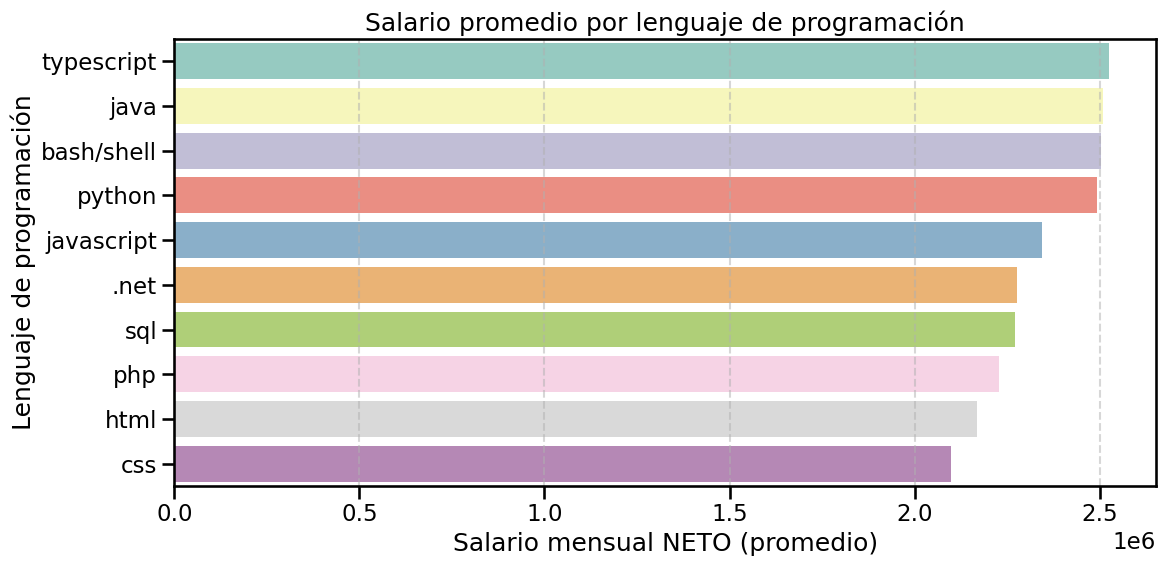

In [57]:
# Agrupamos por lenguaje y calculamos la media de salario
mean_salary_by_lang = (
    filtered_df_lang
    .groupby('programming_language')['salary_monthly_NETO']
    .mean()
    .sort_values(ascending=False)
)
# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
seaborn.barplot(
    x=mean_salary_by_lang.values,
    y=mean_salary_by_lang.index,
    hue=mean_salary_by_lang.index,
    palette='Set3',
)
# Etiquetas
plt.xlabel('Salario mensual NETO (promedio)')
plt.ylabel('Lenguaje de programación')
plt.title('Salario promedio por lenguaje de programación')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

En este gráfico podemos ver que los lenguajes de programación con media más alta son typescript y java.

Veamos cual es la probabilidad de ganar por encima de la media (total)

In [58]:
# el salario medio entre todos los programadores (contando los lenguajes no relevantes) es
mean_salary = df_filtered['salary_monthly_NETO'].mean()
mean_salary

2294445.391697544

In [59]:
# agrupamos por lenguaje de programación, para cada lenguaje toma la serie de 'salary_monthly_NETO'
# compara el sueldo con la media y al plicar .mean() nos da la propoción de True
probs = filtered_df_lang.groupby('programming_language')['salary_monthly_NETO'].apply(
    lambda x: (x > mean_salary).mean()
)
# Luego probs nos da la probabilidad de ganar por encima de la media para cada lenguaje
probs

programming_language
.net          0.404412
bash/shell    0.467500
css           0.310465
html          0.346872
java          0.503234
javascript    0.402696
php           0.353873
python        0.466490
sql           0.390805
typescript    0.469905
Name: salary_monthly_NETO, dtype: float64

In [60]:
# podemos obtener el mínimo y el máximo
lang_min = probs.idxmin()
prob_min = probs.min()
lang_max = probs.idxmax()
prob_max = probs.max()

print("El mínimo es: ", lang_min, " con: ", prob_min)
print("El máximo es: ", lang_max, " con: ", prob_max)

El mínimo es:  css  con:  0.31046511627906975
El máximo es:  java  con:  0.5032341526520052


Por lo tanto, observamos que el lenguaje de programación entre los 10 más usados con el que hay más probabilidades de ganar por encima de la media es java, con un 50,32%. Por otro lado, el lenguaje con el que hay menos probabilidades de ganar por encima de la media es css, con un 31,04%.

Podemos ahora ver que lenguaje utiliza la gente que más plata gana. Para eso podemos ver cuanta gente gana por encima del percentil 90 dependiendo el lenguaje.

In [61]:
# Lo hacemos de manera similar a lo de la media
percentil_90 = df_filtered['salary_monthly_NETO'].quantile(0.90)
percentil_90

4000000.0

In [62]:
probs_90 = filtered_df_lang.groupby('programming_language')['salary_monthly_NETO'].apply(
    lambda x: (x > percentil_90).mean()
)
probs_90

programming_language
.net          0.079044
bash/shell    0.132500
css           0.086047
html          0.085297
java          0.125485
javascript    0.113716
php           0.105634
python        0.118115
sql           0.095307
typescript    0.141499
Name: salary_monthly_NETO, dtype: float64

In [63]:
# podemos obtener el mínimo y el máximo
lang_min_90 = probs_90.idxmin()
prob_min_90 = probs_90.min()
lang_max_90 = probs_90.idxmax()
prob_max_90 = probs_90.max()

print("El mínimo es: ", lang_min_90, " con: ", prob_min_90)
print("El máximo es: ", lang_max_90, " con: ", prob_max_90)

El mínimo es:  .net  con:  0.07904411764705882
El máximo es:  typescript  con:  0.14149947201689547


Por lo tanto, observamos que el lenguaje de programación entre los 10 más usados con el que hay más probabilidades de ganar por encima del percentil 90 es typescript, con un 14,15%. Por otro lado, el lenguaje con el que hay menos probabilidades de ganar por encima del percentil 90 es .net, con un 7,90%.

Podemos hacer un análisis un poco más profundo y ver cuanto cambia el salario si la gente sabe un solo lenguaje de programación o más de uno.

In [64]:
# Crear nuevo DataFrame que copia los lenguajes y el salario de df_filtered (que habia hecho el proceso
# de 'cured_programming_languages' pero no duplicó los datos como en df_lang
df_number_lang = df_filtered[['cured_programming_languages', 'salary_monthly_NETO']].copy()
df_number_lang[:5]

,cured_programming_languages,salary_monthly_NETO
2,[sql],3137662.0
5,[],2167989.0
6,"[.net, python, sql]",4000000.0
7,"[c++, python]",3600000.0
8,"[html, php]",2000000.0


In [65]:
# Notemos que este DataFrame no tiene filtrados los lenguajes interesantes.
# Hacemos una función que verifica si hay al menos un lenguaje interesante en la lista
def has_interesting_language(lang_list):
    return any(lang in interesting_languages for lang in lang_list) # devuelve True si hay lenguaje interesante

# Filtramos por las filas en df_number_lang que tienen al menos un lenguaje interesante
filtered_df_number_lang = df_number_lang[df_number_lang['cured_programming_languages'].apply(has_interesting_language)]
filtered_df_number_lang[:5]

,cured_programming_languages,salary_monthly_NETO
2,[sql],3137662.00
6,"[.net, python, sql]",4000000.00
7,"[c++, python]",3600000.00
8,"[html, php]",2000000.00
9,"[bash/shell, python, sql]",3258576.49


In [66]:
filtered_df_number_lang = filtered_df_number_lang.copy()
# Marcar si la persona sabe más de un lenguaje

# Función auxiliar para saber si hay más de un lenguaje
def knows_more_than_one(langs):
    return len(langs) > 1

# Aplicar la función
filtered_df_number_lang.loc[:, 'more_one_language'] = \
    filtered_df_number_lang['cured_programming_languages'].apply(knows_more_than_one)

# Calcular sueldos altos
filtered_df_number_lang.loc[:, 'higher_mean_salary'] = filtered_df_number_lang['salary_monthly_NETO'] > mean_salary

filtered_df_number_lang[:5]

,cured_programming_languages,salary_monthly_NETO,more_one_language,higher_mean_salary
2,[sql],3137662.00,False,True
6,"[.net, python, sql]",4000000.00,True,True
7,"[c++, python]",3600000.00,True,True
8,"[html, php]",2000000.00,True,False
9,"[bash/shell, python, sql]",3258576.49,True,True


In [67]:
# Agrupamos y calculamos proporción
probs_by_lang_count = filtered_df_number_lang.groupby('more_one_language')['higher_mean_salary'].mean()
probs_by_lang_count

more_one_language
False    0.327119
True     0.420951
Name: higher_mean_salary, dtype: float64

La probabilidad de ganar más que la media sabiendo 1 lenguaje es del 33% mientras que sabiendo más de uno es del 41,32%.

Para visualizar mejor estos datos, hagamos un boxplot.

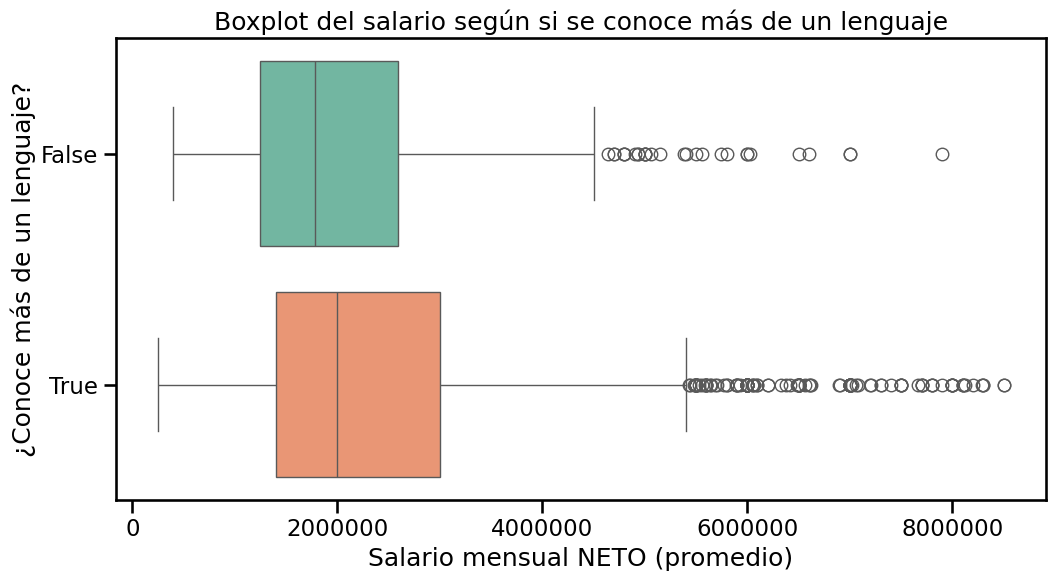

In [69]:
plt.figure(figsize=(12, 6))
filtered_df_number_lang['more_one_language'] = filtered_df_number_lang['more_one_language'].astype('category')
seaborn.boxplot(data=filtered_df_number_lang, 
                x='salary_monthly_NETO', 
                y='more_one_language',
                hue='more_one_language',
                legend=False,
                palette='Set2')
plt.xlabel('Salario mensual NETO (promedio)')
plt.ylabel('¿Conoce más de un lenguaje?')
plt.title('Boxplot del salario según si se conoce más de un lenguaje')
plt.ticklabel_format(style='plain', axis='x')

En conclusión, los lenguajes de programación que muestran mayor utilidad en términos salariales son Java y TypeScript. Ambos presentan las medias salariales más elevadas. Por un lado, Java es el lenguaje que ofrece la mayor probabilidad de ganar por encima del salario medio. Por otro lado, TypeScript es el lenguaje más común entre quienes se encuentran por encima del percentil 99 de ingreso.

También observamos que CSS no parece ser un lenguaje particularmente valorado en el mercado, al menos en términos de salario. Es el que presenta la media más baja entre los diez lenguajes más utilizados y la menor probabilidad de alcanzar o superar la media salarial.

Por último, nuestros datos indican que conocer más de un lenguaje de programación se asocia con mayores ingresos.

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica.
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
